In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200507_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200507_P60

## Si II 6355

<AxesSubplot:>

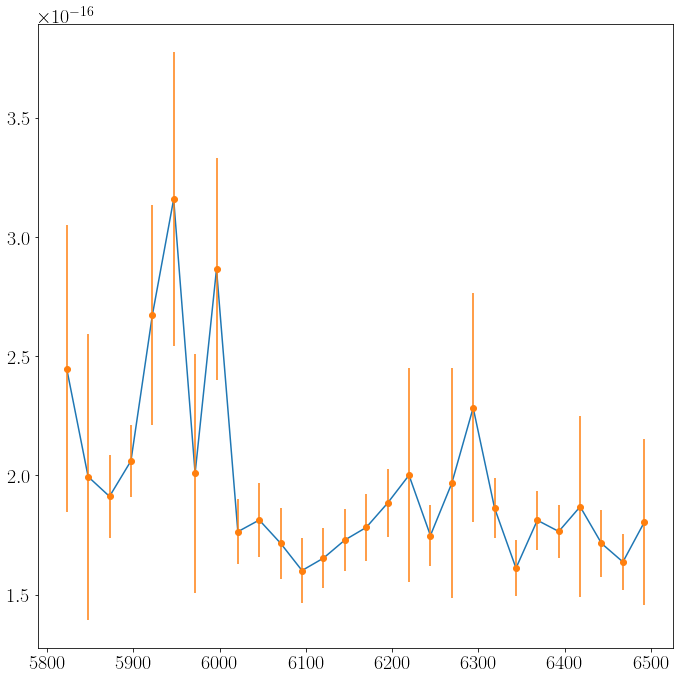

In [3]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5900, 6300, lines=[6371.359, 6347.103])

16 points within 5900.00 and 6300.00 angstroms.


In [ ]:
Spec1.line['SiII_6355'].LS_estimator()

In [ ]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

<AxesSubplot:>

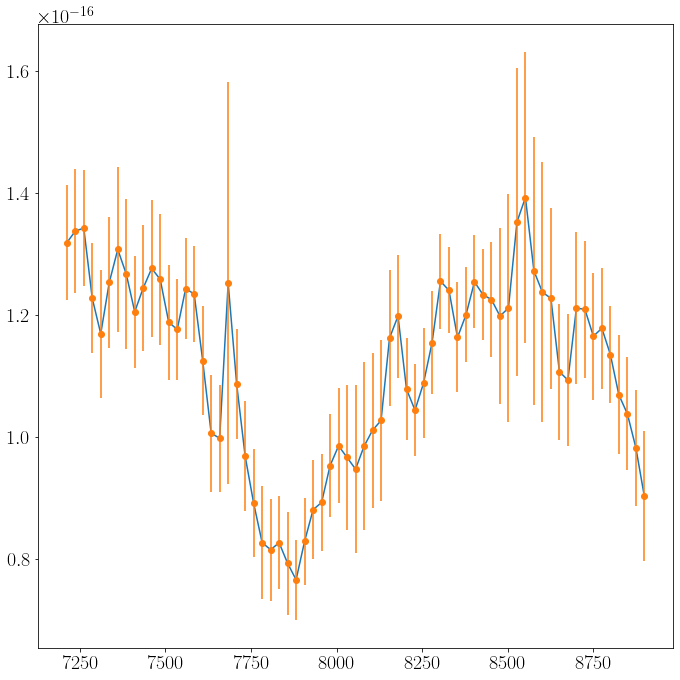

In [4]:
Spec1.plot_line_region(7200, 8900)

## hvf

In [15]:
Spec1.add_line('CaII_IRT',
               7300,
               8500,
               lines=[[8498.018, 8542.089, 8662.140]],
               rel_strength=[[1, 1, 1]])
Spec1.line['CaII_IRT'].LS_estimator()

LS estimation:
Velocity 1: -25178 km/s


Normalize factor = 0.585


100%|██████████████████████████████████████| 1000/1000 [00:08<00:00, 122.02it/s]


MCMC results:
Velocity 1: -25147 pm 374 km/s


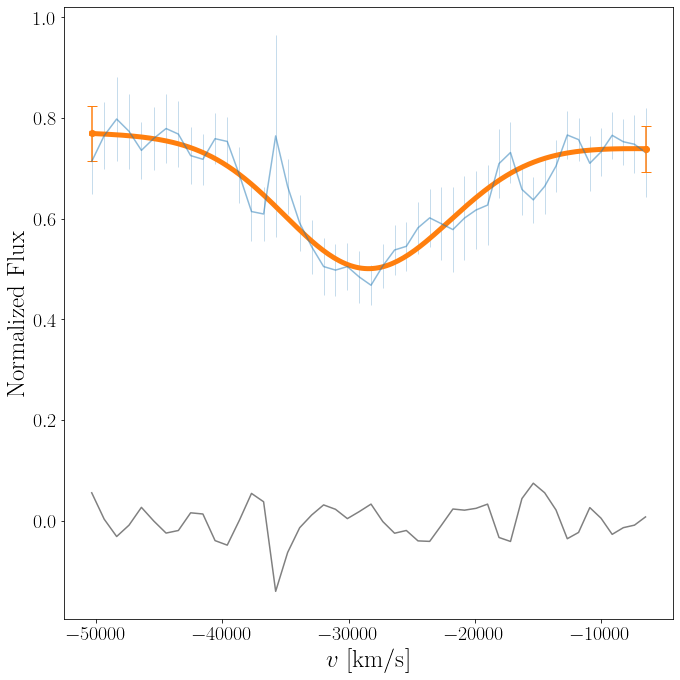

Normalize factor = 0.586


  6%|██▏                                  | 3000/50000 [00:25<06:37, 118.34it/s]


MCMC results:
Velocity 1: -25116 pm 382 km/s


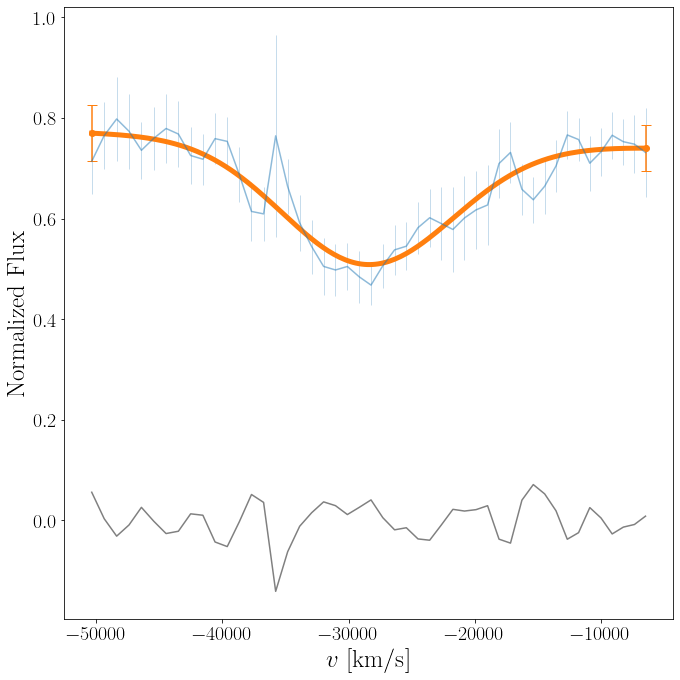

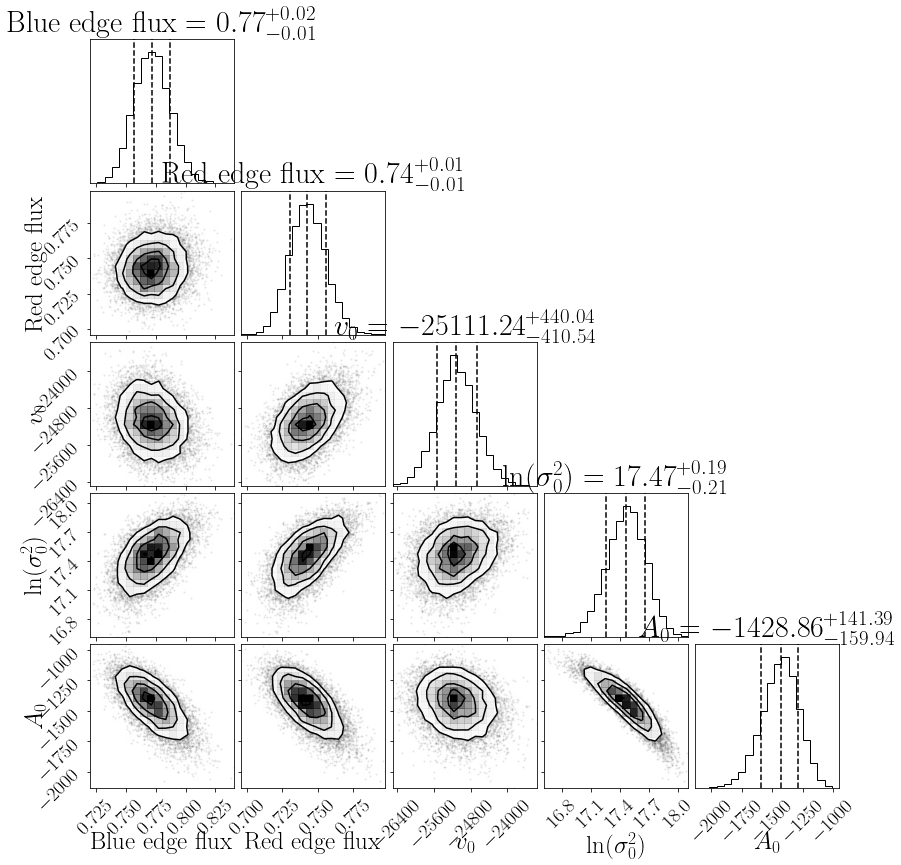

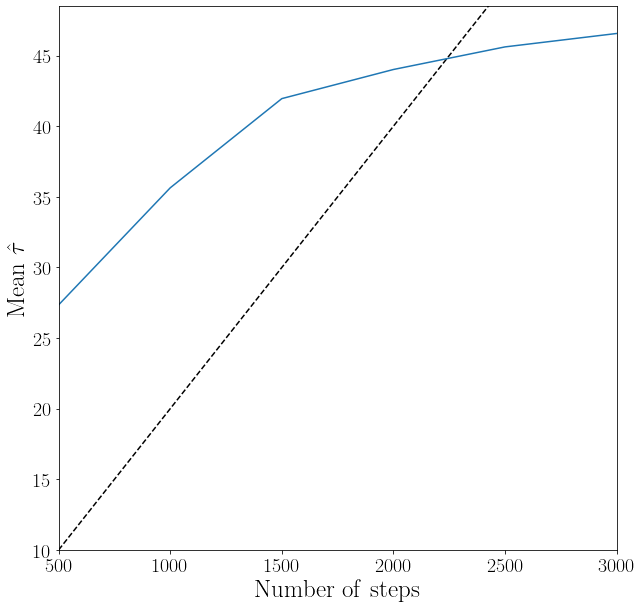

In [16]:
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    initial=[1, 1, -25000, 15, -1000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=True)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## hvf + pvf

In [17]:
Spec1.add_line('CaII_IRT/CaII_IRT',
               7300,
               8500,
               lines=[[8498.018, 8542.089, 8662.140],
                      [8498.018, 8542.089, 8662.140]],
               rel_strength=[[], []])
Spec1.line['CaII_IRT/CaII_IRT'].LS_estimator(guess=(1, 1, -25000, 15, -1000,
                                                    -12000, 15, -1000))

LS estimation:
Velocity 1: -26509 km/s
Velocity 2: -19323 km/s


Normalize factor = 0.536


100%|███████████████████████████████████████| 1000/1000 [00:13<00:00, 71.54it/s]


MCMC results:
Velocity 1: -25925 pm 490 km/s
Velocity 2: -15383 pm 2787 km/s
Normalize factor = 0.466


  9%|███▍                                  | 4500/50000 [01:04<10:47, 70.30it/s]

MCMC results:
Velocity 1: -25884 pm 247 km/s
Velocity 2: -15330 pm 120 km/s


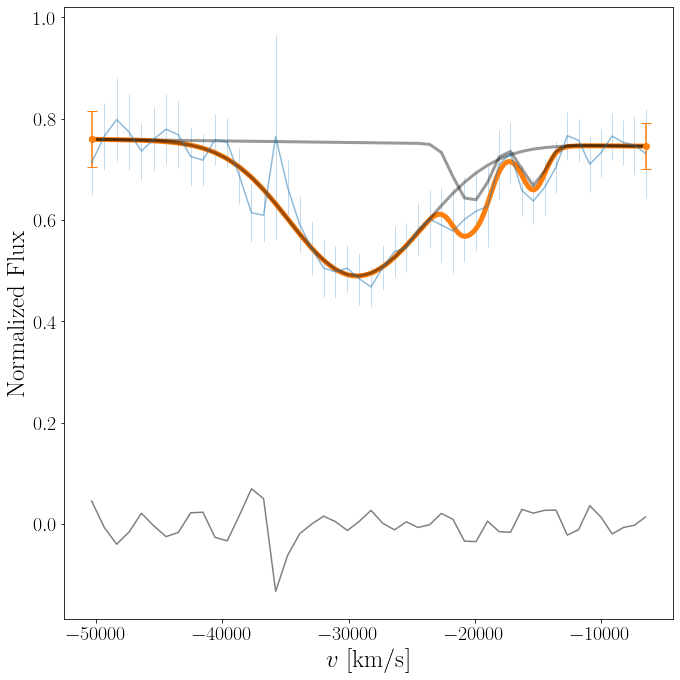

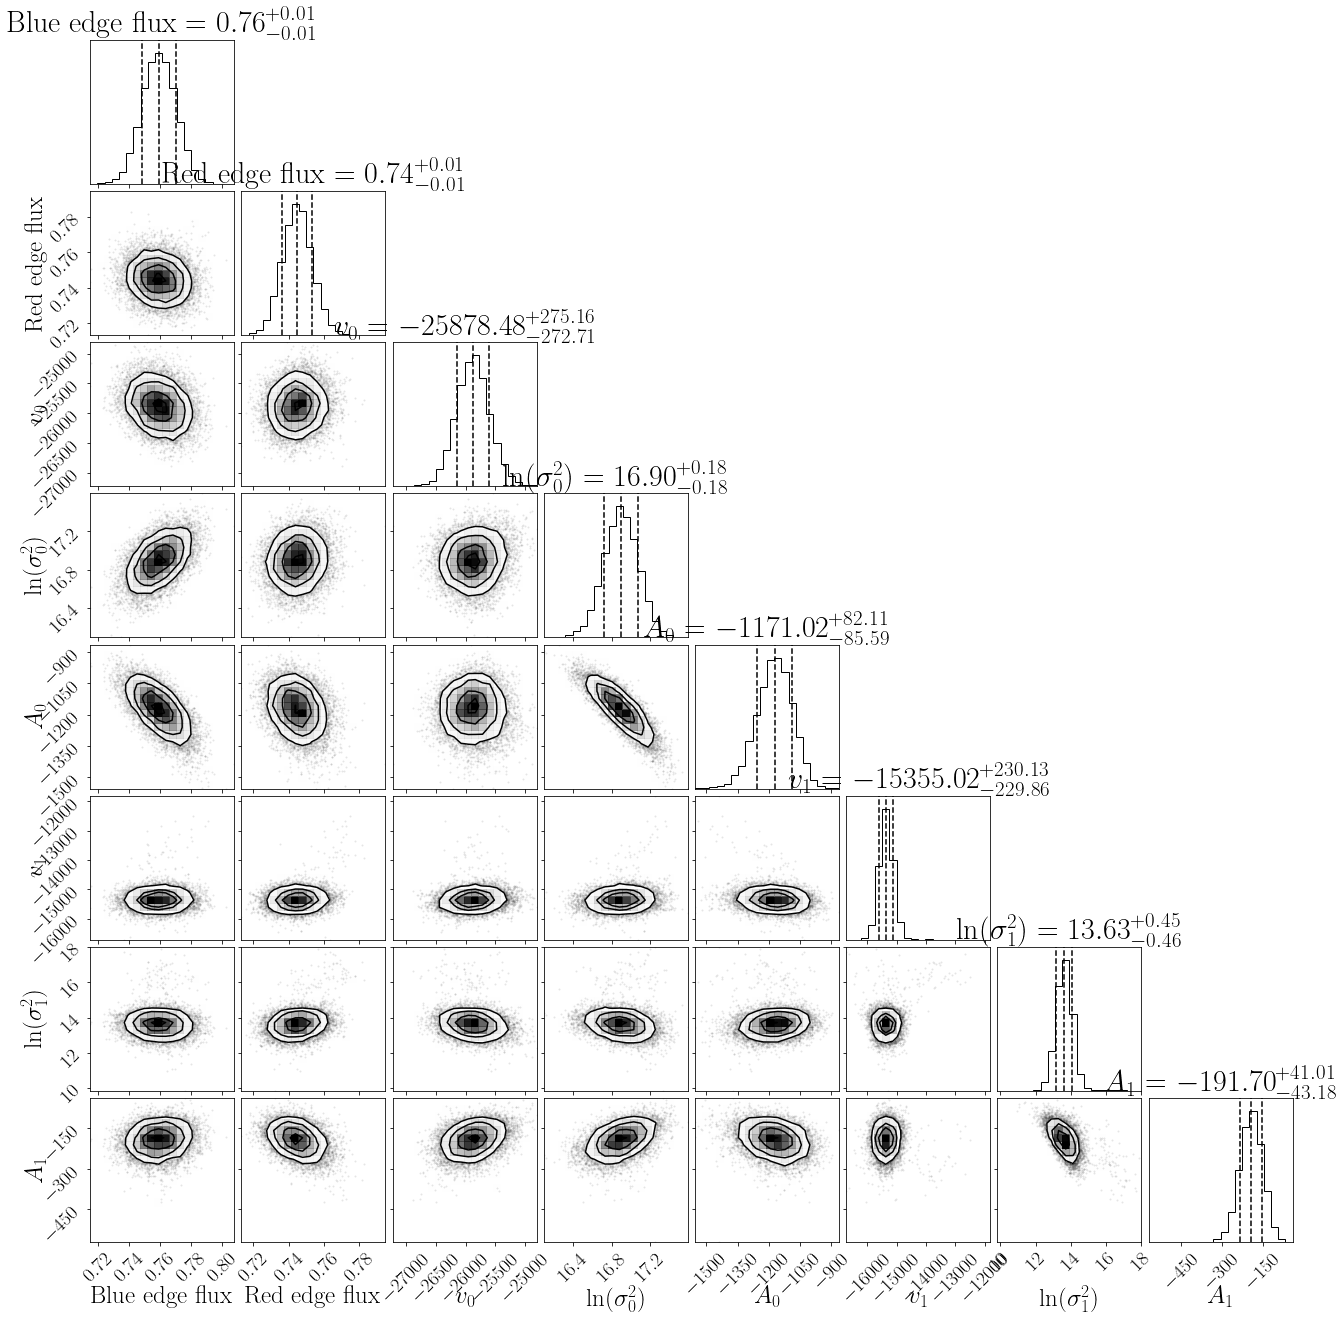

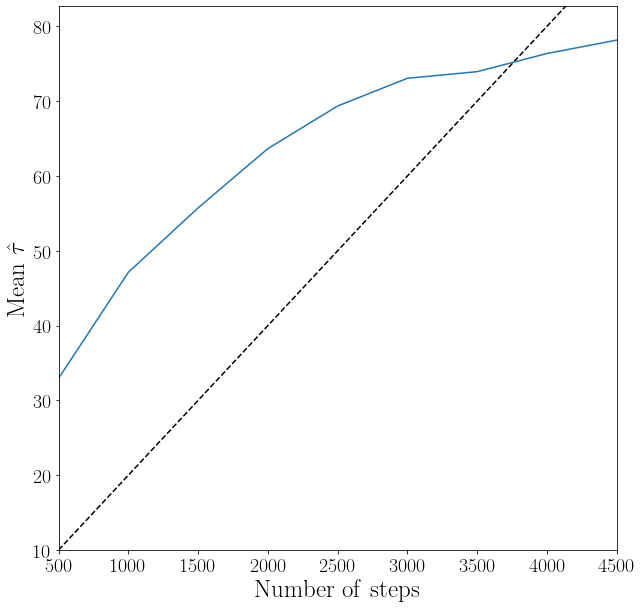

In [18]:
mu1 = -26000
mu2 = -12000
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=[1, 1, -25000, 15, -1000, -12000, 15, -1000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['CaII_IRT/CaII_IRT'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)